In [1]:
import os
import time
import numpy as np
import pandas as pd

from skimage import io

import tifffile

import matplotlib.pyplot as plt
from CellMet.io import write_tiff

In [2]:
path = "/mnt/sda1/CellSegPaperDatas/Gastrulation_data/T20/"
seg_filename = "20161108-embPHcherry-t20_cp_masks_correct.tif"
seg_filename = "skeleton.tif"

In [3]:
# load image
image = io.imread(os.path.join(path, seg_filename))


In [115]:
tifffile.imwrite(os.path.join(path, "skeleton_readable.tif"),
                image.astype("uint16"), 
                 imagej=True,
                 resolution=(1,1),
                 metadata={
                     'spacing': 1,
                     'unit': 'pixel',
                     'axes': 'ZYX',
                 },
                )

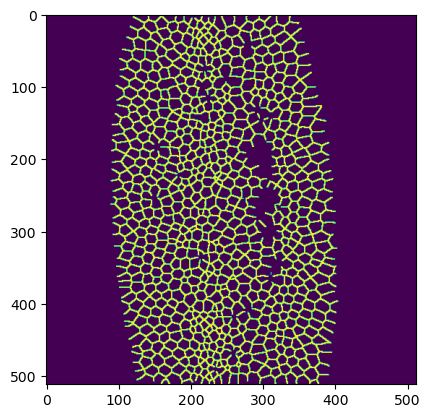

In [116]:
plt.imshow((image)[50])

In [34]:
for i in np.unique(image)[1:]:
    image2 = np.zeros(image.shape)
    image2 = image==i

    tifffile.imwrite(os.path.join(path+"/id/", str(i)+".tif"),
                image2.astype("uint16"), 
                 imagej=True,
                 resolution=(1,1),
                 metadata={
                     'spacing': 1,
                     'unit': 'pixel',
                     'axes': 'ZYX',
                 },
                )

In [49]:
list_file = os.listdir(path+"/id/")

image3 = np.zeros(image.shape)

for f in list_file :
    im = io.imread(os.path.join(path+"/id", f))
    pos = np.where(im>0)
    image3[pos] = int(f.split(".")[0])    

In [50]:
tifffile.imwrite(os.path.join(path, "mask_v4.tif"),
                image3.astype("uint16"), 
                 imagej=True,
                 resolution=(1,1),
                 metadata={
                     'spacing': 1,
                     'unit': 'pixel',
                     'axes': 'ZYX',
                 },
                )

In [58]:
# Violin plot

In [35]:
t8_data= pd.read_csv("/mnt/sda1/CellSegPaperDatas/Gastrulation_data/T8/cell_df.csv")
t20_data= pd.read_csv("/mnt/sda1/CellSegPaperDatas/Gastrulation_data/T20/cell_df.csv")
t8_data["time"] = 8
t20_data["time"] = 20
data = pd.concat([t8_data.sort_values(["nb_neighbor"]), t20_data.sort_values(["nb_neighbor"])])[["time", "nb_neighbor"]]

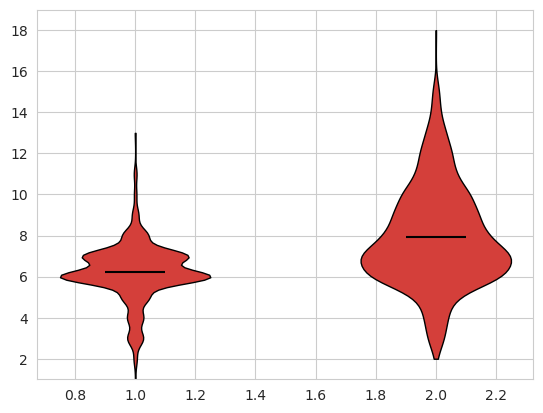

In [57]:
import seaborn as sns
    
fig, ax = plt.subplots()
parts = ax.violinplot([t8_data["nb_neighbor"], t20_data["nb_neighbor"]],showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    
ax.hlines(t8_data["nb_neighbor"].mean(), 0.9,1.1, colors="black")
ax.hlines(t20_data["nb_neighbor"].mean(), 1.9,2.1, colors="black")

ax.set_ylim(1,19)

fig.savefig("/mnt/sda1/CellSegPaperDatas/Gastrulation_data/nb_neighbor.eps")

In [49]:
t8_data["nb_neighbor"].mean()

6.231200897867565

In [59]:
# single cell

In [8]:
path = "/mnt/sda1/CellSegPaperDatas/Gastrulation_data/T20/"
seg_filename = "20161108-embPHcherry-t20_cp_masks_correct.tif"
image = io.imread(os.path.join(path, seg_filename))


In [9]:
cell_df = pd.read_csv(os.path.join(path,"cell_df.csv"), index_col=0)
face_df = pd.read_csv(os.path.join(path,"face_df.csv"), index_col=0)
edge_df = pd.read_csv(os.path.join(path,"edge_df.csv"), index_col=0)

cell_plane_df = pd.read_csv(os.path.join(path,"cell_plane_df.csv"), index_col=0)

face_pixel_df = pd.read_csv(os.path.join(path,"face_pixel_df.csv"), index_col=0)
edge_pixel_df = pd.read_csv(os.path.join(path,"edge_pixel_df.csv"), index_col=0)

In [10]:
from CellMet.io import make_mesh_file


cell_id = 242

color_face_img = np.zeros(image.shape)
color_face_img[np.where(image==cell_id)] = 1

all_neighbours = np.unique(np.concatenate([face_pixel_df[face_pixel_df['id_im_1'] == cell_id]['id_im_2'].unique(),
                                           face_pixel_df[face_pixel_df['id_im_2'] == cell_id]['id_im_1'].unique()]))

i = 2
for im2 in all_neighbours:
    print(im2)
#     color_face_img = np.zeros(image.shape)
    sub_face = face_pixel_df[(face_pixel_df['id_im_2'] == cell_id) & (face_pixel_df['id_im_1'] == im2)]
    if len(sub_face) == 0:
        sub_face = face_pixel_df[(face_pixel_df['id_im_1'] == cell_id) & (face_pixel_df['id_im_2'] == im2)]
    color_face_img[sub_face['z'].to_numpy().astype(int),
                  sub_face['y'].to_numpy().astype(int),
                  sub_face['x'].to_numpy().astype(int)] = i
    i+=1

    
all_neighbours = np.unique(np.concatenate([edge_pixel_df[edge_pixel_df['id_im_1'] == cell_id]['id_im_2'].unique(),
                                           edge_pixel_df[edge_pixel_df['id_im_2'] == cell_id]['id_im_1'].unique()]))

    
for im2 in all_neighbours:
    print(im2)
#     color_face_img = np.zeros(image.shape)
    sub_face = edge_pixel_df[(edge_pixel_df['id_im_2'] == cell_id) & (edge_pixel_df['id_im_1'] == im2)]
    if len(sub_face) == 0:
        sub_face = edge_pixel_df[(edge_pixel_df['id_im_1'] == cell_id) & (edge_pixel_df['id_im_2'] == im2)]
    color_face_img[sub_face['z'].to_numpy().astype(int),
                  sub_face['y'].to_numpy().astype(int),
                  sub_face['x'].to_numpy().astype(int)] = 20

160.0
184.0
240.0
243.0
244.0
246.0
298.0
299.0
381.0
160.0
184.0
240.0
243.0
244.0
246.0
298.0
299.0
381.0


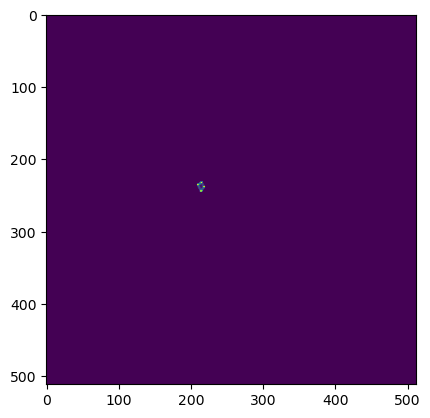

In [55]:
plt.imshow(color_face_img[12])

In [56]:
pixel_size = dict(x_size = 0.4151329,
                  y_size = 0.4151329,
                  z_size = 0.5711487,)
write_tiff(color_face_img, "cell_"+str(cell_id), path, pixel_size)

In [56]:
import ZebrafishMuscle.plot as ZMplot
import plotly.graph_objects as go
fig = go.Figure()

for c_id in [547]:
# c_id = 79 750
    fig = ZMplot.draw_cell(image, c_id, fig=fig, **{"opacity":0.5})
    fig = ZMplot.draw_face(face_pixel_df, c_id, dict(x_size=1, y_size=1, z_size=1), 
                           fig=fig, 
                           **dict(size=5, marker_symbol="square",)
                          )
    
    ZMplot.draw_edges(edge_df, edge_pixel_df, c_id, dict(x_size=1, y_size=1, z_size=1), fig=fig)
    
fig.update_layout(title='Cell center, edge position',
              autosize=False,
              width=900,
              height=900,
              margin=dict(l=65, r=50, b=65, t=90),
              showlegend=False,
#               scene = dict(
#                 aspectratio=dict(x=pixel_size["x_size"], 
#                                  y=pixel_size["y_size"], 
#                                  z=pixel_size["z_size"]),
#                 ),
              )
fig.update_traces(marker={'size': 2, "symbol":"square"})

fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False )

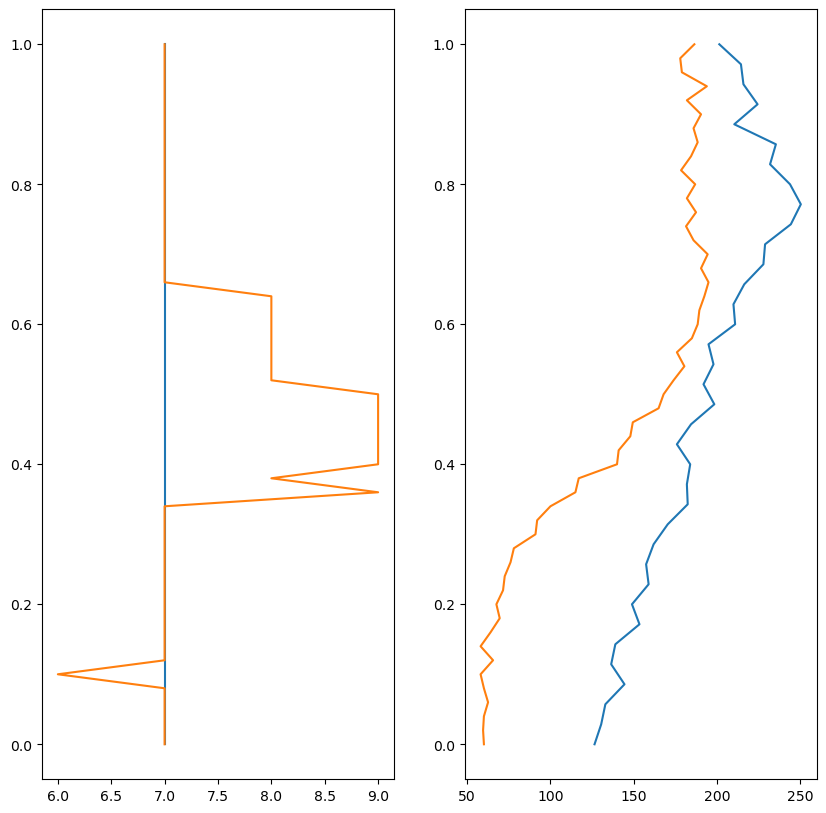

In [86]:
fig, (ax, ax2) = plt.subplots(ncols=2)
min_ = 9
max_ = -4
id1 = 547
ax.plot(cell_plane_df[cell_plane_df["id_im"]==id1]["nb_neighbor"][min_:max_],
        (cell_plane_df[cell_plane_df["id_im"]==id1]["z_center"][min_:max_]-np.min(cell_plane_df[cell_plane_df["id_im"]==id1]["z_center"][min_:max_]))/np.max((cell_plane_df[cell_plane_df["id_im"]==id1]["z_center"][min_:max_]-np.min(cell_plane_df[cell_plane_df["id_im"]==id1]["z_center"][min_:max_])))
         )
id2=242
ax.plot(cell_plane_df[cell_plane_df["id_im"]==id2]["nb_neighbor"][min_:max_],
        (cell_plane_df[cell_plane_df["id_im"]==id2]["z_center"][min_:max_]-np.min(cell_plane_df[cell_plane_df["id_im"]==id2]["z_center"][min_:max_]))/np.max(cell_plane_df[cell_plane_df["id_im"]==id2]["z_center"][min_:max_]-np.min(cell_plane_df[cell_plane_df["id_im"]==id2]["z_center"][min_:max_])),
         )

id1 = 547
ax2.plot(cell_plane_df[cell_plane_df["id_im"]==id1]["area"][min_:max_],
        (cell_plane_df[cell_plane_df["id_im"]==id1]["z_center"][min_:max_]-np.min(cell_plane_df[cell_plane_df["id_im"]==id1]["z_center"][min_:max_]))/np.max((cell_plane_df[cell_plane_df["id_im"]==id1]["z_center"][min_:max_]-np.min(cell_plane_df[cell_plane_df["id_im"]==id1]["z_center"][min_:max_])))
         )
id2=242
ax2.plot(cell_plane_df[cell_plane_df["id_im"]==id2]["area"][min_:max_],
        (cell_plane_df[cell_plane_df["id_im"]==id2]["z_center"][min_:max_]-np.min(cell_plane_df[cell_plane_df["id_im"]==id2]["z_center"][min_:max_]))/np.max(cell_plane_df[cell_plane_df["id_im"]==id2]["z_center"][min_:max_]-np.min(cell_plane_df[cell_plane_df["id_im"]==id2]["z_center"][min_:max_])),
         )

fig.set_size_inches((10,10))
fig.savefig("/home/u2175049/Desktop/area_neighbor.eps")

In [63]:
(cell_plane_df[cell_plane_df["id_im"]==id1]["z_center"]-np.min(cell_plane_df[cell_plane_df["id_im"]==id1]["z_center"]))/np.max((cell_plane_df[cell_plane_df["id_im"]==id1]["z_center"]-np.min(cell_plane_df[cell_plane_df["id_im"]==id1]["z_center"])))

25306    0.000000
25307    0.020833
25308    0.041667
25309    0.062500
25310    0.083333
25311    0.104167
25312    0.125000
25313    0.145833
25314    0.166667
25315    0.187500
25316    0.208333
25317    0.229167
25318    0.250000
25319    0.270833
25320    0.291667
25321    0.312500
25322    0.333333
25323    0.354167
25324    0.375000
25325    0.395833
25326    0.416667
25327    0.437500
25328    0.458333
25329    0.479167
25330    0.500000
25331    0.520833
25332    0.541667
25333    0.562500
25334    0.583333
25335    0.604167
25336    0.625000
25337    0.645833
25338    0.666667
25339    0.687500
25340    0.708333
25341    0.729167
25342    0.750000
25343    0.770833
25344    0.791667
25345    0.812500
25346    0.833333
25347    0.854167
25348    0.875000
25349    0.895833
25350    0.916667
25351    0.937500
25352    0.958333
25353    0.979167
25354    1.000000
Name: z_center, dtype: float64

In [6]:
import numpy as np
import ipyvolume as ipv

path = "/mnt/sda1/CellSegPaperDatas/Gastrulation_data/T20/"
seg_filename = "cell_242-crop_larger.tif"
image_cell = io.imread(os.path.join(path, seg_filename))


# ipv.clear()
ipv.figure()
ipv.style.box_off()

c_list= ["red", "blue", "green", "pink", "purple", "orange", "brown", "light_blue", "light_green"]
cpt = 0
for i in range(2,11):
    x,y,z = np.where(image_cell==i)
    ipv.scatter(x/image_cell.shape[2], 
                y/image_cell.shape[1], 
                z/image_cell.shape[1], size=1, marker="sphere", color = c_list[cpt])
    cpt+=1
    
x,y,z = np.where(image_cell==20)
ipv.scatter(x/image_cell.shape[2], 
            y/image_cell.shape[1], 
            z/image_cell.shape[1], size=1, marker="box", color = "black")
    

ipv.style.box_off()
ipv.show()

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…